In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import matplotlib

In [2]:
import importlib
import plotting_utils
import utils
import euler_utils
import predictions_evaluations
importlib.reload(plotting_utils)
importlib.reload(utils)
importlib.reload(euler_utils)
importlib.reload(predictions_evaluations)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

In [3]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'

In [16]:
last_iter = 103

In [17]:
data_dynamic_PN_km1000_MSA06 = euler_utils.read_output(scratch_folder + 'dynamic_PN_km1000_expDecay_msa06',
                                                      last_iter=last_iter)
data_dynamic_PN_km1000_MW5 = euler_utils.read_output(scratch_folder + 'dynamic_PN_km1000_expDecay_mw5',
                                                      last_iter=last_iter)


100%|██████████| 104/104 [01:15<00:00,  1.38it/s]


In [18]:
data_dynamic_CN_k1000_MSA06 = euler_utils.read_output(scratch_folder + 'dynamic_CN_k1000_expDecay_msa06',
                                                      last_iter=last_iter)
data_dynamic_CN_k1000_MW5 = euler_utils.read_output(scratch_folder + 'dynamic_CN_k1000_expDecay_mw5',
                                                      last_iter=last_iter)

100%|██████████| 104/104 [01:16<00:00,  1.36it/s]


In [19]:
data_zonal_hex_MSA06 = euler_utils.read_output(scratch_folder + 'zonal_hex_msa06',
                                                      last_iter=last_iter)
data_zonal_hex_MW5 = euler_utils.read_output(scratch_folder + 'zonal_hex_mw5',
                                                      last_iter=last_iter)

100%|██████████| 104/104 [01:14<00:00,  1.40it/s]


In [20]:
last_iter_dict = {
    'Zonal hex MSA=0.6': data_zonal_hex_MSA06['drt_trips_stats'][last_iter],
    'Zonal hex MW=5': data_zonal_hex_MW5['drt_trips_stats'][last_iter],
    'Dynamic CN k=1000 MSA=0.6': data_dynamic_CN_k1000_MSA06['drt_trips_stats'][last_iter],
    'Dynamic CN k=1000 MW=5': data_dynamic_CN_k1000_MW5['drt_trips_stats'][last_iter],
    'Dynamic PN km=1000 MSA=0.6': data_dynamic_PN_km1000_MSA06['drt_trips_stats'][last_iter],
    'Dynamic PN km=1000 MW=5': data_dynamic_PN_km1000_MW5['drt_trips_stats'][last_iter],
}

In [21]:
display(plotting_utils.get_multiple_stats_table(last_iter_dict))


Zonal hex MSA=0.6  \
Number of rides                                      194310.000000   
Wait time (min)                   Mean                    7.540491   
                                  Median                  5.733333   
                                  Std                     9.281066   
                                  75-percentile          10.050000   
                                  99-percentile          40.015167   
                                  Max                   404.433333   
Travel time (min)                 Mean                   12.655212   
                                  Median                  7.450000   
                                  Std                    15.238406   
                                  75-percentile          15.466667   
                                  99-percentile          74.965167   
                                  Max                   265.800000   
Mean direct distance (km)                                 2.647298   
Average detour factor (time wise)                         1.589052   

                                                 Zonal hex MW=5  \
Number of rides                                   197796.000000   
Wait time (min)                   Mean                 6.918998   
                                  Median               5.333333   
                                  Std                  6.692065   
                                  75-percentile        9.483333   
                                  99-percentile       30.300000   
                                  Max                198.466667   
Travel time (min)                 Mean                12.412223   
                                  Median               7.416667   
                                  Std                 14.731350   
                                  75-percentile       15.350000   
                                  99-percentile       72.000000   
                                  Max                241.083333   
Mean direct distance (km)                              2.635941   
Average detour factor (time wise)                      1.578835   

                                                 Dynamic CN k=1000 MSA=0.6  \
Number of rides                                              199014.000000   
Wait time (min)                   Mean                            6.996849   
                                  Median                          5.466667   
                                  Std                             7.435845   
                                  75-percentile                   9.566667   
                                  99-percentile                  30.097833   
                                  Max                           333.083333   
Travel time (min)                 Mean                           12.301674   
                                  Median                          7.416667   
                                  Std                            14.767681   
                                  75-percentile                  15.250000   
                                  99-percentile                  71.566667   
                                  Max                           291.216667   
Mean direct distance (km)                                         2.642184   
Average detour factor (time wise)                                 1.571704   

                                                 Dynamic CN k=1000 MW=5  \
Number of rides                                           197600.000000   
Wait time (min)                   Mean                         7.089486   
                                  Median                       5.466667   
                                  Std                          6.566447   
                                  75-percentile               10.000000   
                                  99-percentile               28.683500   
                                  Max                        273.850000   
Travel

In [22]:
plot_list = [
    ('Zonal hex MSA=0.6', data_zonal_hex_MSA06, last_iter),
    ('Zonal hex MW=5',data_zonal_hex_MW5, last_iter),
    ('Dynamic CN k=1000 MSA=0.6', data_dynamic_CN_k1000_MSA06, last_iter),
    ('Dynamic CN k=1000 MW=5', data_dynamic_CN_k1000_MW5, last_iter),
    ('Dynamic PN km=1000 MSA=0.6', data_dynamic_PN_km1000_MSA06, last_iter),
    ('Dynamic PN km=1000 MW=5', data_dynamic_PN_km1000_MW5, last_iter)
]

,count,mean,std,min,25%,50%,75%,95%,99%,max,MSE,RMSE,MAE,% errors < 0
title,,,,,,,,,,,,,,
Zonal hex MSA=0.6 on iteration 103,19649.0,0.044314,8.352298,-24.264978,-3.041990,-0.720600,1.902521,7.728401,28.725029,264.209168,69.759294,8.352203,4.007427,58.135274
Zonal hex MW=5 on iteration 103,20511.0,-0.214368,5.457800,-30.858657,-2.730347,-0.695801,1.768823,6.615640,17.160404,123.039869,29.832080,5.461875,3.337493,58.120033
Dynamic CN k=1000 MSA=0.6 on iteration 103,20307.0,-0.248989,6.141321,-25.481468,-2.527918,-0.637441,1.577863,6.004602,15.843735,150.151329,37.775968,6.146216,3.214628,58.467524
Dynamic CN k=1000 MW=5 on iteration 103,20660.0,0.101933,5.603417,-35.955095,-2.506899,-0.384355,2.430079,7.627940,15.974012,119.313189,31.407155,5.604209,3.553867,54.491772
Dynamic PN km=1000 MSA=0.6 on iteration 103,20790.0,0.034026,4.971931,-29.968163,-2.513718,-0.427823,2.374930,7.508546,13.507499,126.281502,24.720067,4.971928,3.383425,54.805195
Dynamic PN km=1000 MW=5 on iteration 103,20744.0,0.414191,7.041288,-33.063918,-2.365907,-0.317083,2.292815,8.368891,18.647843,223.513588,49.748906,7.053290,3.621377,54.001157


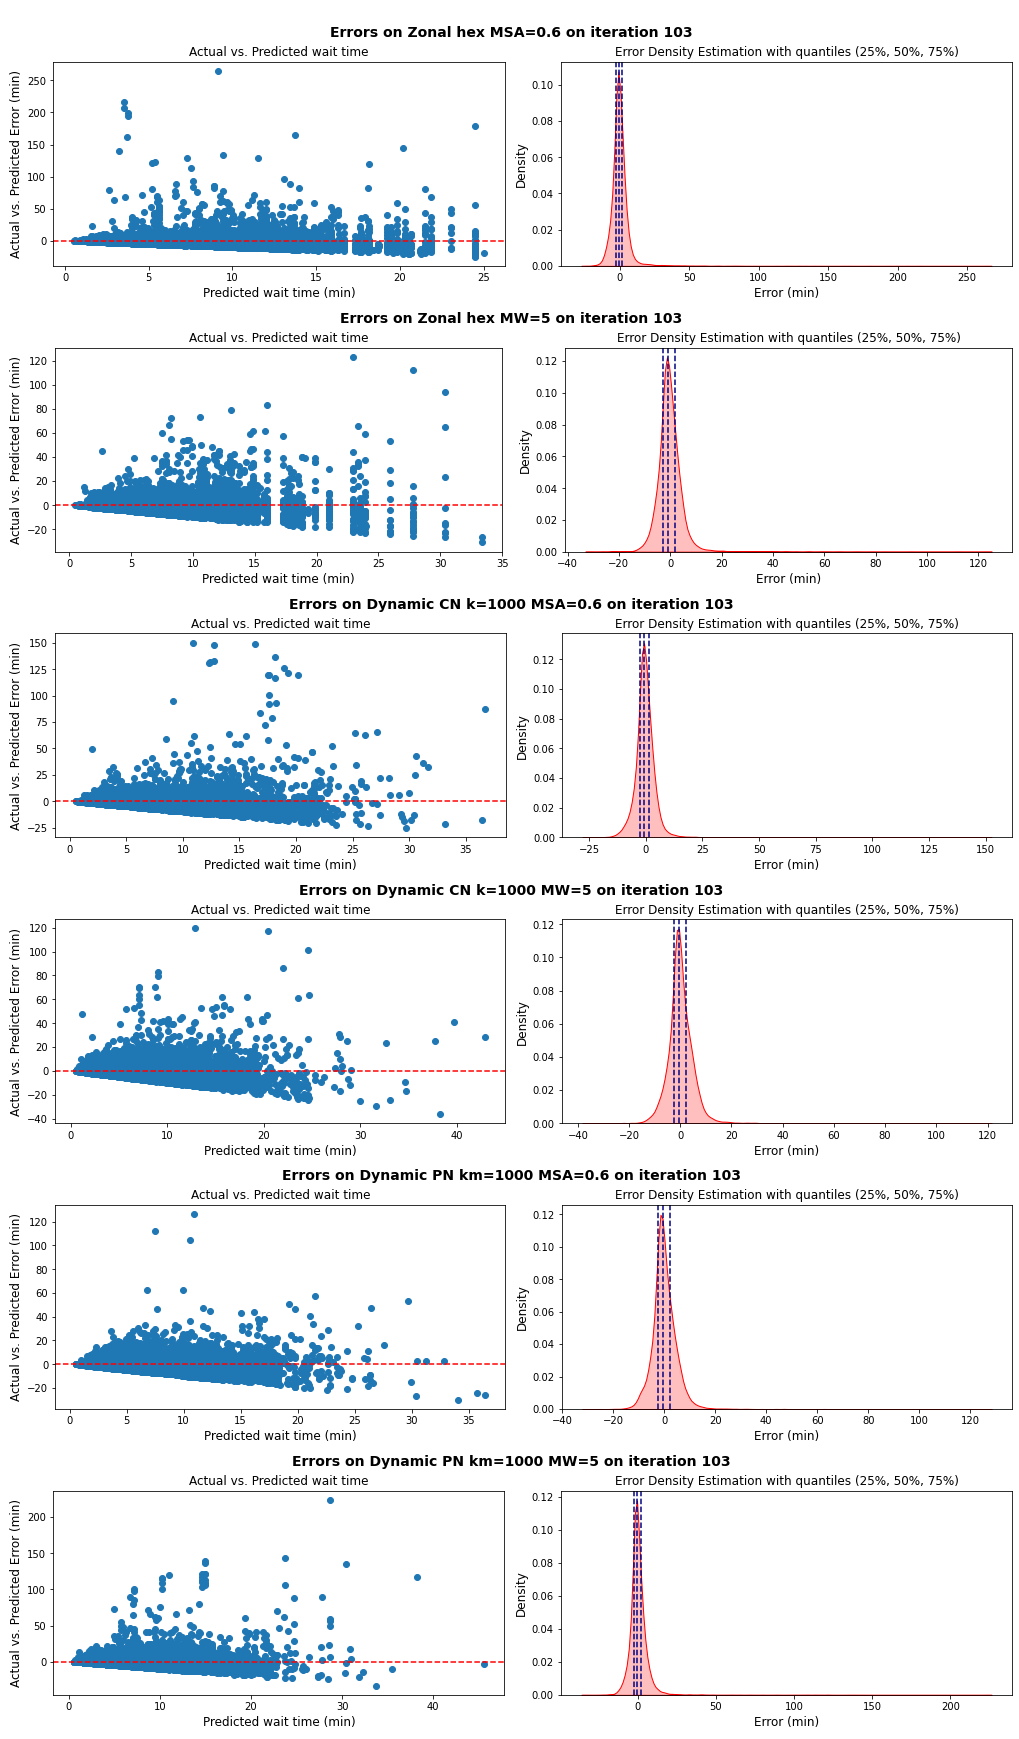

In [23]:
waitTime_pred_stats = predictions_evaluations.plot_multiple_actual_vs_fitted(plot_list, 'waitTime')

In [26]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

msa_list = [
    ('Zonal hex MSA=0.6', data_zonal_hex_MSA06, c_gradient[0], '-'),
    ('Dynamic CN k=1000 MSA=0.6', data_dynamic_CN_k1000_MSA06, c_gradient[1], '--'),
    ('Dynamic PN km=1000 MSA=0.6', data_dynamic_PN_km1000_MSA06, c_gradient[2], ':'),
]
mw_list = [
    ('Zonal hex MW=5',data_zonal_hex_MW5, c_gradient[0], '-'),
    ('Dynamic CN k=1000 MW=5', data_dynamic_CN_k1000_MW5, c_gradient[1], '--'),
    ('Dynamic PN km=1000 MW=5', data_dynamic_PN_km1000_MW5, c_gradient[2], ':')
]

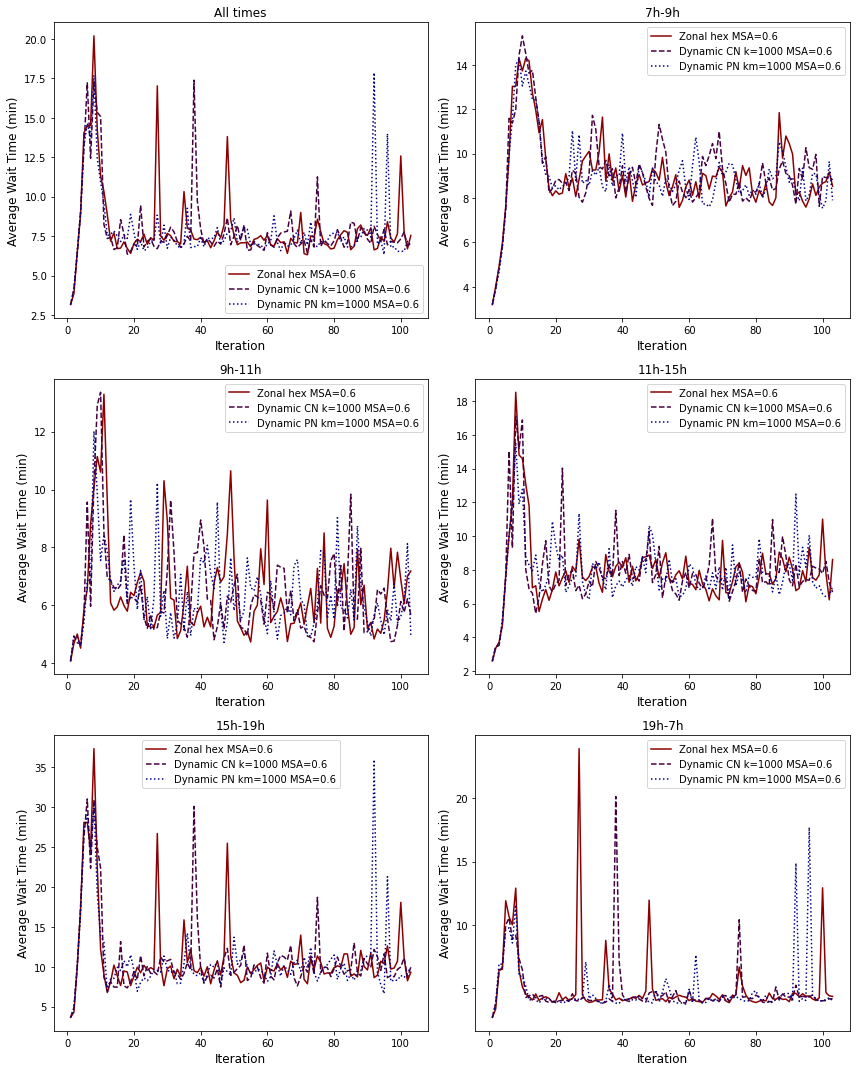

In [31]:
predictions_evaluations.plot_iteration_avg_wait_time(msa_list)

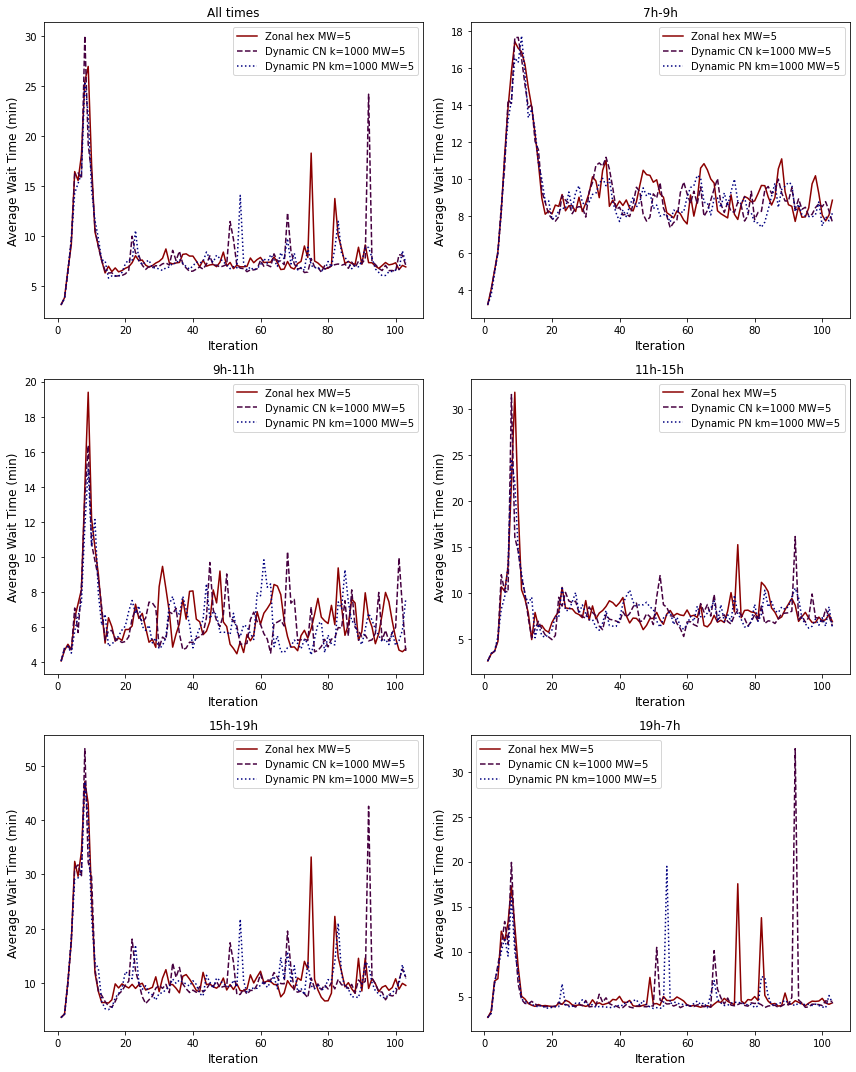

In [32]:
predictions_evaluations.plot_iteration_avg_wait_time(mw_list)

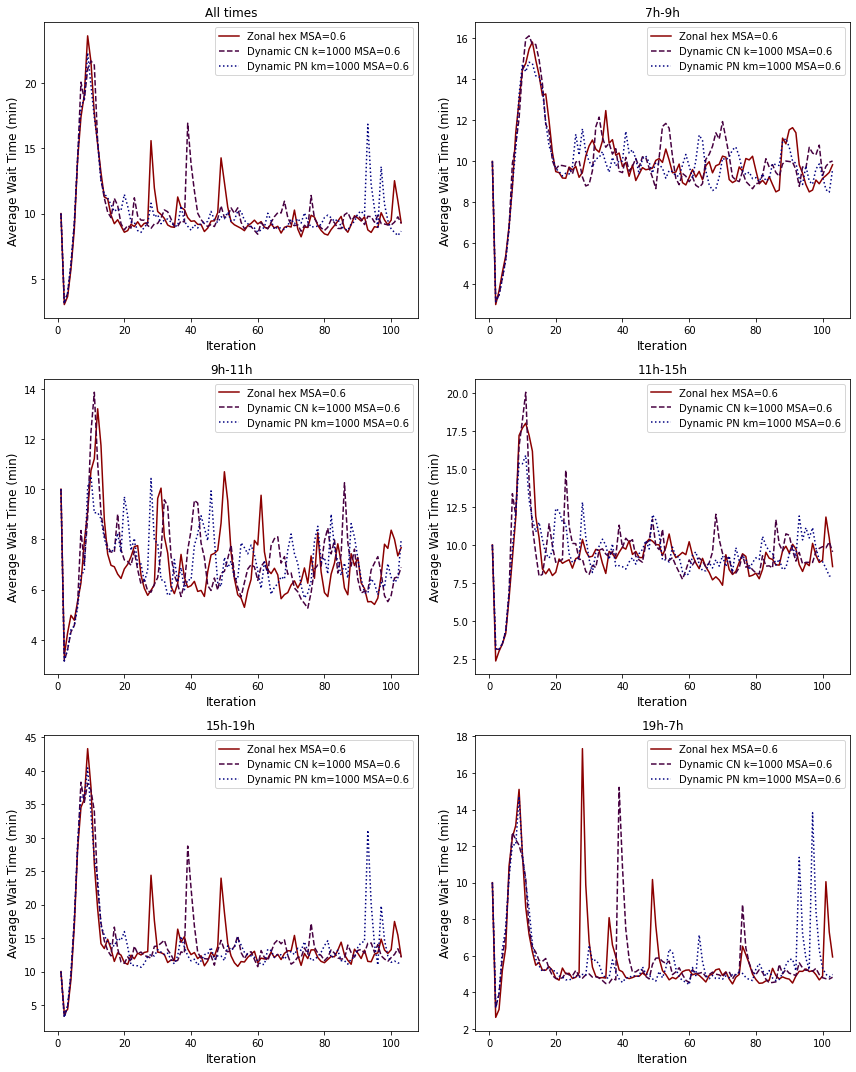

In [29]:
predictions_evaluations.plot_iteration_avg_wait_time(msa_list, predictions=True)

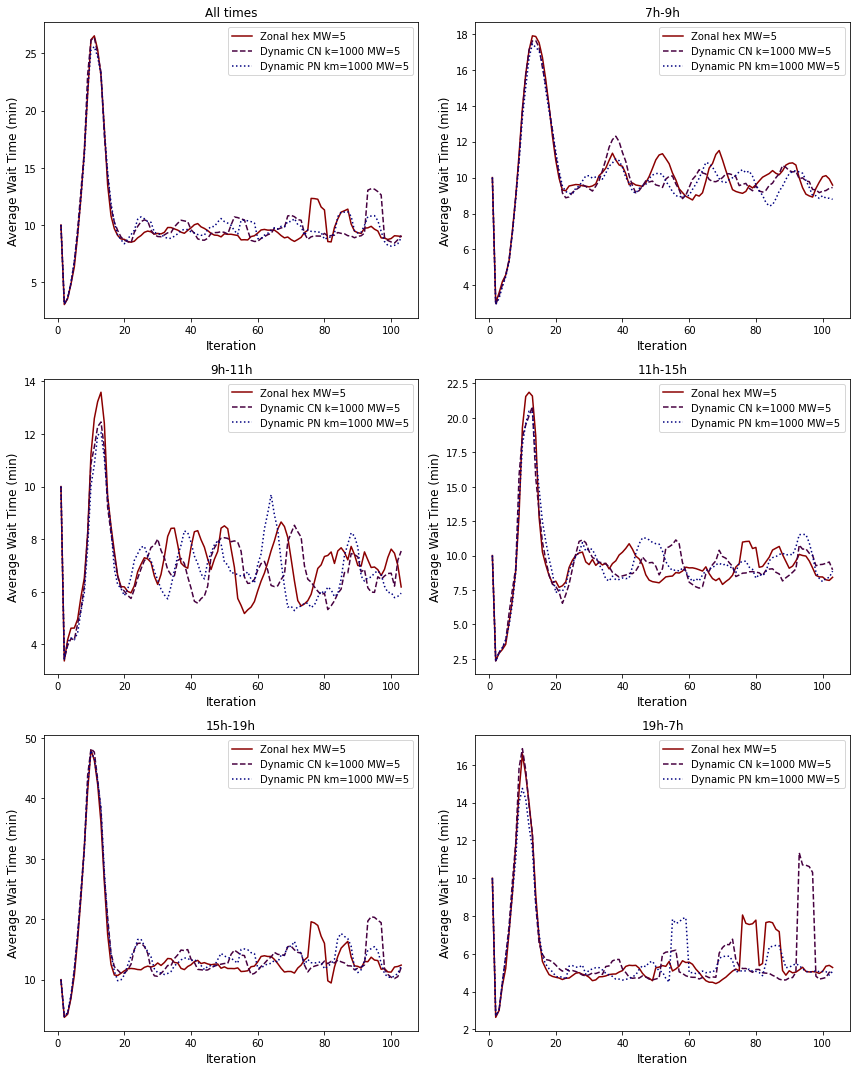

In [30]:
predictions_evaluations.plot_iteration_avg_wait_time(mw_list, predictions=True)